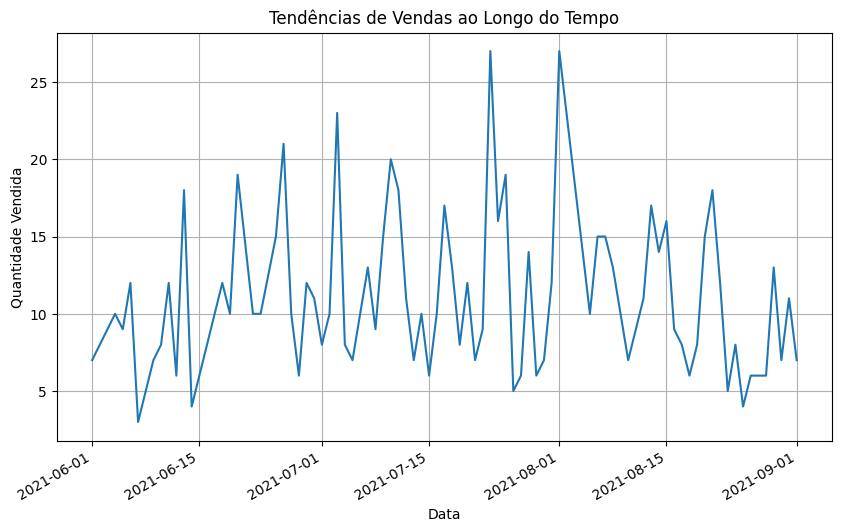

In [19]:
# Gráfico de Linhas para Tendências de Vendas ao Longo do Tempo
import pandas as pd
import matplotlib.pyplot as plt

dados_combinados = pd.read_csv('../data/dados_combinados.csv', sep=';')

dados_combinados['DATA'] = pd.to_datetime(dados_combinados['DATA'])

vendas_por_data = dados_combinados.groupby('DATA')['QUANTIDADE'].sum()

plt.figure(figsize=(10,6))
vendas_por_data.plot()

plt.title('Tendências de Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()


In [25]:
# Adicionar coluna com dias da semana
import pandas as pd

dados_combinados['DATA'] = pd.to_datetime(dados_combinados['DATA'])

dados_combinados['DIA_DA_SEMANA'] = dados_combinados['DATA'].dt.day_name()

# Dicionário de mapeamento Inglês-Português
traducao = {
    'Monday': 'Segunda',
    'Tuesday': 'Terça',
    'Wednesday': 'Quarta',
    'Thursday': 'Quinta',
    'Friday': 'Sexta',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Traduzindo a coluna
dados_combinados['DIA_DA_SEMANA'] = dados_combinados['DIA_DA_SEMANA'].map(traducao)

dados_combinados.head()

,ID_PEDIDO,ID_ITEM,QUANTIDADE,VALOR_UNIT,DATA,VALOR_TOTAL_ITEM,VALOR_TOTAL_PEDIDO,DIA_DA_SEMANA,FERIADO
0,120210601,item C,4,20,2021-06-01,80,80,Terça,False
1,220210601,item A,3,10,2021-06-01,30,30,Terça,False
2,320210604,item C,1,20,2021-06-04,20,20,Sexta,False
3,420210604,item B,4,15,2021-06-04,60,100,Sexta,False
4,420210604,item C,2,20,2021-06-04,40,100,Sexta,False


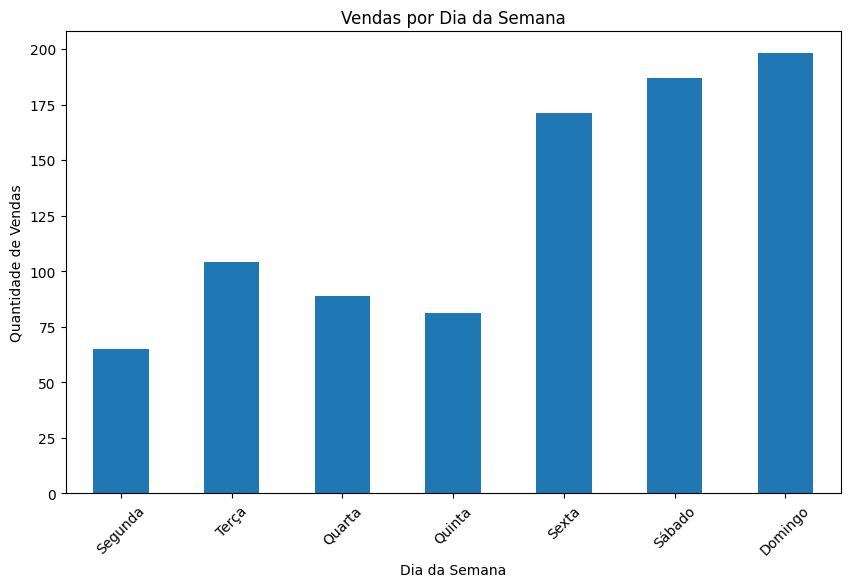

In [28]:
# Grafico de vendas por dias da semana
import pandas as pd
import matplotlib.pyplot as plt

vendas_por_dia_da_semana = dados_combinados.groupby('DIA_DA_SEMANA')['QUANTIDADE'].sum()

ordenado = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
vendas_por_dia_da_semana = vendas_por_dia_da_semana.reindex(ordenado)

vendas_por_dia_da_semana.plot(kind='bar', figsize=(10, 6))

plt.title('Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.show()


In [21]:
# Adicionar coluna com feriados nacionais
import pandas as pd
import holidays

dados_combinados['DATA'] = pd.to_datetime(dados_combinados['DATA'])

feriados_br = holidays.Brazil()

dados_combinados['FERIADO'] = dados_combinados['DATA'].apply(lambda x: x in feriados_br)

dados_combinados.head()


,ID_PEDIDO,ID_ITEM,QUANTIDADE,VALOR_UNIT,DATA,VALOR_TOTAL_ITEM,VALOR_TOTAL_PEDIDO,DIA_DA_SEMANA,FERIADO
0,120210601,item C,4,20,2021-06-01,80,80,Tuesday,False
1,220210601,item A,3,10,2021-06-01,30,30,Tuesday,False
2,320210604,item C,1,20,2021-06-04,20,20,Friday,False
3,420210604,item B,4,15,2021-06-04,60,100,Friday,False
4,420210604,item C,2,20,2021-06-04,40,100,Friday,False


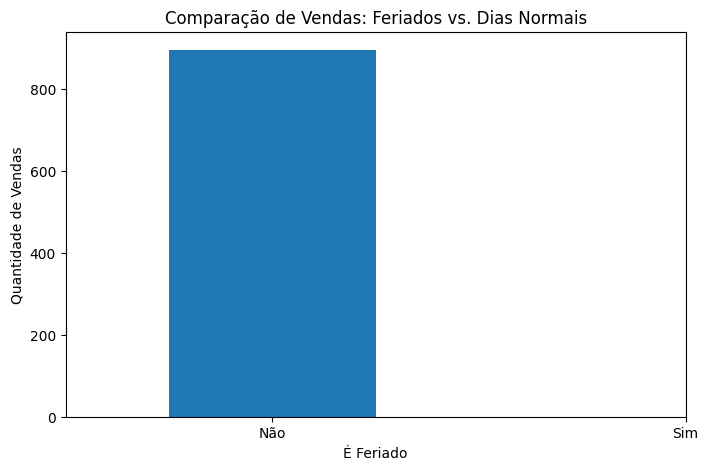

In [10]:
# Gráfico de vendas em dias normais e feriados
import matplotlib.pyplot as plt

vendas_por_feriado = dados_combinados.groupby('FERIADO')['QUANTIDADE'].sum()

vendas_por_feriado.plot(kind='bar', figsize=(8, 5))

plt.title('Comparação de Vendas: Feriados vs. Dias Normais')
plt.xlabel('É Feriado')
plt.ylabel('Quantidade de Vendas')
plt.xticks([0, 1], ['Não', 'Sim'], rotation=0)
plt.show()


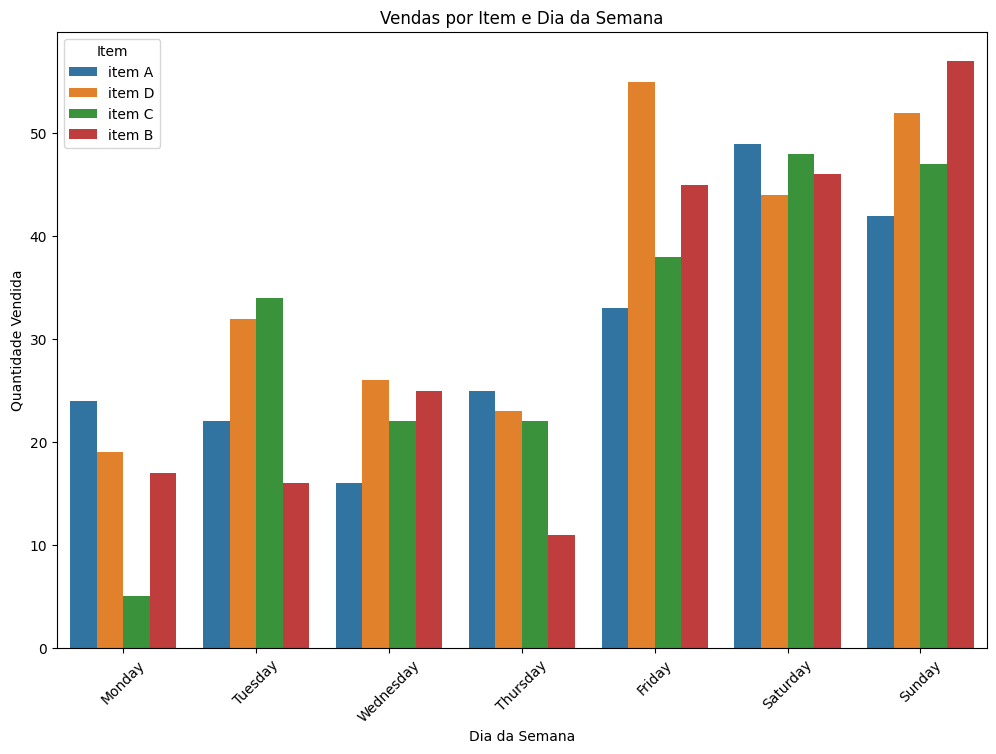

In [14]:
# Grafico para visualizar vendas por item e dia da semana
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dados_combinados['DATA'] = pd.to_datetime(dados_combinados['DATA'])

vendas_por_item_dia = dados_combinados.groupby(['ID_ITEM', 'DIA_DA_SEMANA'])['QUANTIDADE'].sum().reset_index()

dias_da_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
vendas_por_item_dia['DIA_DA_SEMANA'] = pd.Categorical(vendas_por_item_dia['DIA_DA_SEMANA'], categories=dias_da_semana, ordered=True)
vendas_por_item_dia = vendas_por_item_dia.sort_values('DIA_DA_SEMANA')

plt.figure(figsize=(12, 8))
sns.barplot(data=vendas_por_item_dia, x='DIA_DA_SEMANA', y='QUANTIDADE', hue='ID_ITEM')

plt.title('Vendas por Item e Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.legend(title='Item')
plt.show()



In [22]:
dados_combinados.describe()

,ID_PEDIDO,QUANTIDADE,VALOR_UNIT,DATA,VALOR_TOTAL_ITEM,VALOR_TOTAL_PEDIDO
count,2.950000e+02,295.000000,295.000000,295,295.000000,295.000000
mean,7.675465e+09,3.033898,17.898305,2021-07-18 13:54:42.711864320,54.101695,112.474576
min,1.202106e+08,1.000000,10.000000,2021-06-01 00:00:00,10.000000,10.000000
25%,4.170211e+09,2.000000,15.000000,2021-06-27 12:00:00,30.000000,60.000000
50%,7.920211e+09,3.000000,20.000000,2021-07-18 00:00:00,50.000000,100.000000
75%,1.122021e+10,4.000000,25.000000,2021-08-08 00:00:00,75.000000,155.000000
max,1.472021e+10,5.000000,25.000000,2021-09-01 00:00:00,125.000000,385.000000
std,4.263869e+09,1.418609,5.623369,NaN,31.117888,73.357144


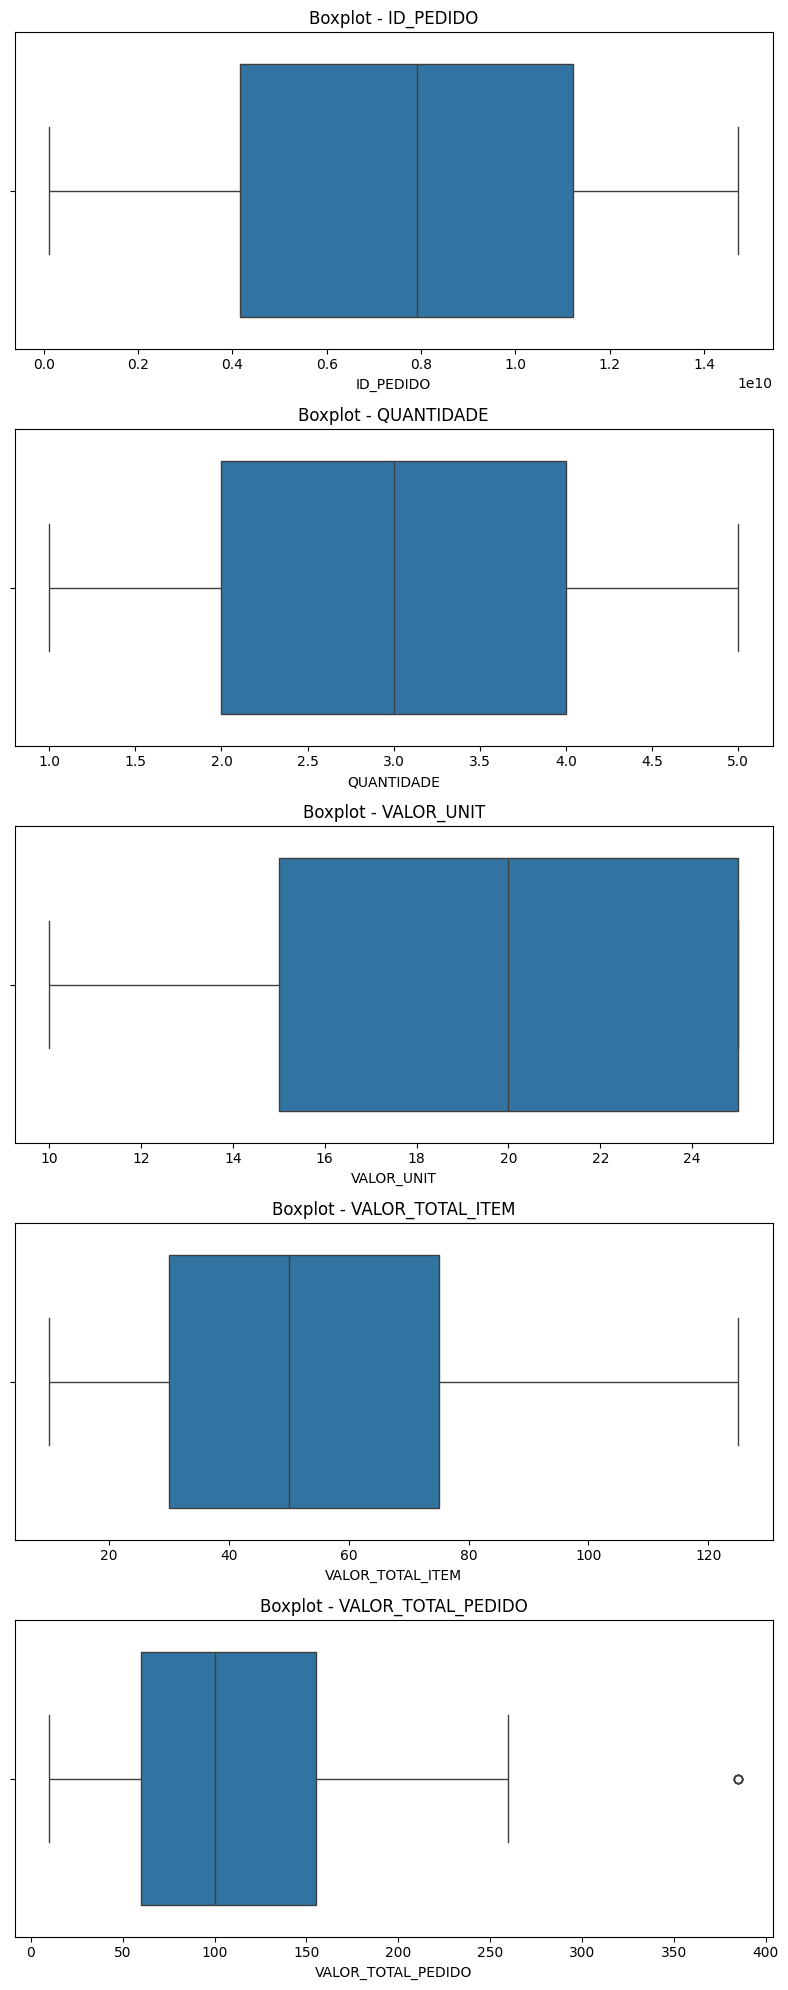

In [31]:
# Selecionar apenas colunas numéricas
colunas_numericas = dados_combinados.select_dtypes(include=['float64', 'int64']).columns

# Criar boxplots para cada coluna numérica
plt.figure(figsize=(8, 4 * len(colunas_numericas)))
for i, coluna in enumerate(colunas_numericas):
    plt.subplot(len(colunas_numericas), 1, i+1)
    sns.boxplot(x=dados_combinados[coluna])
    plt.title(f'Boxplot - {coluna}')
plt.tight_layout()
plt.show()


In [23]:
dados_combinados.to_csv('../data/dados_combinados.csv', index=False, sep=';')